# Segmenting and Clustering Neighborhoods in Toronto - Part 1

For this assignment, you will be required to explore and cluster the neighbourhoods in Toronto.


1. Start by creating a new Notebook for this assignment.

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:
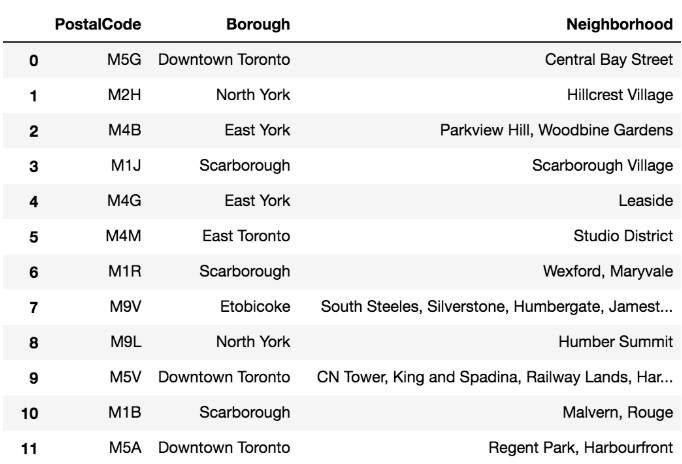

In [232]:
import pandas
dfs = pandas.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M',header=0)
dfs[0]

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned



3. To create the above dataframe:

- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood.
- Only process the cells that have an assigned borough. Ignore cells with a borough that is **Not assigned**.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that **M5A** is listed twice and has two neighborhoods: **Harbourfront** and **Regent Park**. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
- If a cell has a borough but a **Not assigned** neighborhood, then the neighborhood will be the same as the borough. So for the **9th** cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be **Queen's Park**.
- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
- In the last cell of your notebook, use the **.shape** method to print the number of rows of your dataframe.


In [242]:
# Ignore cells with a borough that is Not assigned.
dfs[0]
df = dfs[0][dfs[0]['Borough']!='Not assigned']
Postcodes = df.groupby('Postcode').groups
indexarr=[]
for key in Postcodes.keys():
    indexarr=Postcodes[key]
    for i in indexarr:
        if indexarr[0]==i:
            # If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
            if df['Neighbourhood'][i]=='Not assigned':
                df['Neighbourhood'][i] = df['Borough'][i]
        else:
            # More than one neighborhood are combined into one row in one postal code.
            df['Neighbourhood'][indexarr[0]] += ',' + df['Neighbourhood'][i]
            df.drop(index=i, axis=0, inplace=True)
df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Harbourfront,Regent Park"
6,M6A,North York,"Lawrence Heights,Lawrence Manor"
8,M7A,Queen's Park,Queen's Park
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,"Rouge,Malvern"
14,M3B,North York,Don Mills North
15,M4B,East York,"Woodbine Gardens,Parkview Hill"
17,M5B,Downtown Toronto,"Ryerson,Garden District"


4. Submit a link to your Notebook on your Github repository. (**10 marks**)

**Note**: There are different website scraping libraries and packages in Python. One of the most common packages is BeautifulSoup. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples of how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use the BeautifulSoup package or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

* *This notebook was created by **Shannon Wang**.*

In [243]:
df.shape

(103, 3)